In [1]:
# Explanatory Data Analysis (EDA) for Fraud Detection

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load Dataset
df = pd.read_csv("/Users/srushtiselkar/Projects/fraud-detection-ml/data/creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


In [2]:
df.shape

(284807, 31)

In [3]:
df.info()
# Class has string values, it should be int (0,1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df['Class'].unique()

array(["'0'", "'1'"], dtype=object)

In [9]:
df['Class'] = df['Class'].str.replace("'","")

In [11]:
df['Class'] = df['Class'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [17]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [19]:
df['Class'].value_counts(normalize=True)
# the dataset is highly imbalanced . Only ~0.17% transactions are fraud.

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [21]:
# check for missing values
df.isnull().sum()
#no missing values found

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

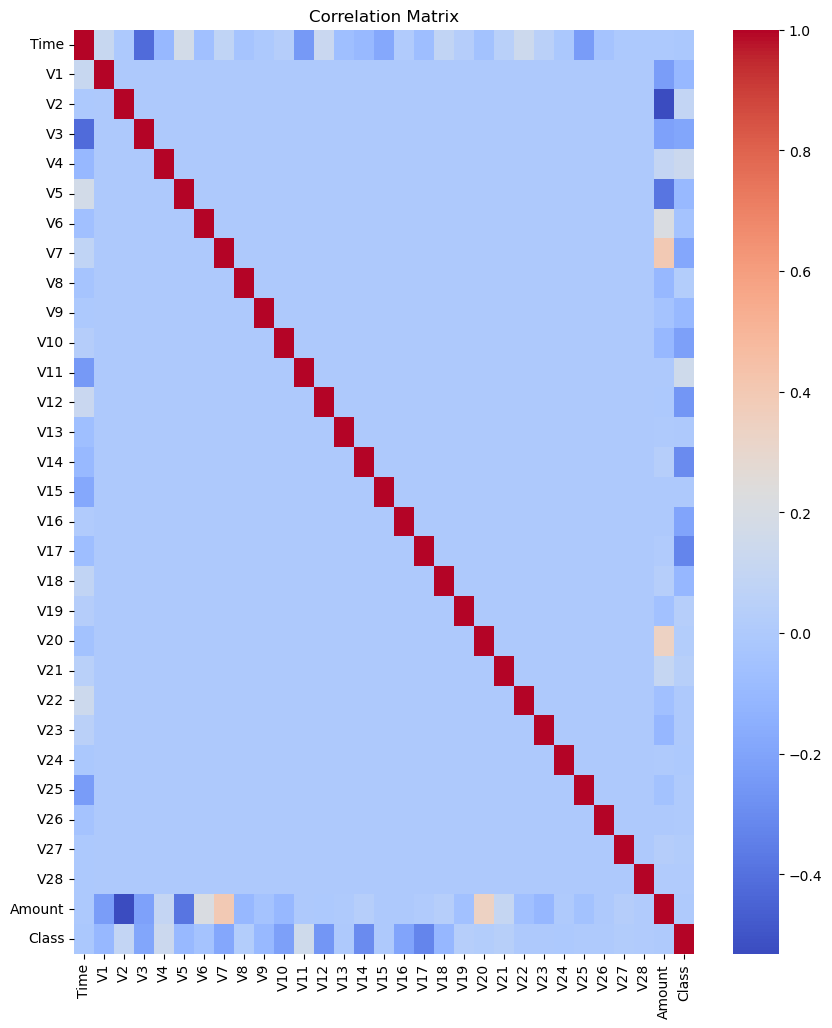

In [23]:
#Correlation Analysis
plt.figure(figsize=(10,12))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

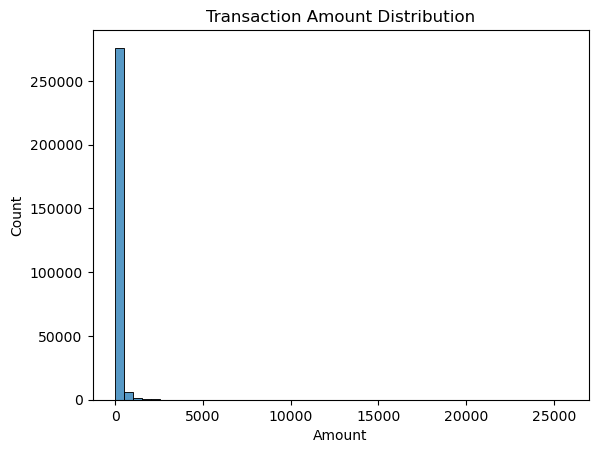

In [25]:
#Distribution of Amount
sns.histplot(df['Amount'],bins=50)
plt.title("Transaction Amount Distribution")
plt.show()
#Amount is heavily skewed
#needs scaling

In [27]:
#FEATURE SCALING
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
df['scaled_time'] = scaler.fit_transform(df[['Time']])
df.drop(['Amount','Time'],axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [29]:
X = df.drop('Class',axis=1)
y=df['Class']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [35]:
y_pred=model.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("ROC-AUC:" , roc_auc_score(y_test,y_pred))

[[56851    13]
 [   35    63]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.8213142636063991


In [39]:
#Handle Class IMbalance

model = LogisticRegression(max_iter=1000, class_weight = 'balanced')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[55475  1389]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [41]:
#Threshold tuning

y_probs = model.predict_proba(X_test)[:,1]

#try threshold 0.7
y_pred_custom = (y_probs>0.7).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_custom))
print(classification_report(y_test, y_pred_custom))

#Recall value still high and reduced false positives more than half

[[56221   643]
 [    9    89]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.91      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.60     56962
weighted avg       1.00      0.99      0.99     56962



In [43]:
#Random forest model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators = 100,
    class_weight = 'balanced',
    random_state = 42,
    n_jobs = -1
)

rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

#extremely low FP , good precision and recall value

[[56861     3]
 [   25    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [45]:
#Plot feature importance

import pandas as pd
feature_importance = pd.Series(rf.feature_importances_, index = X.columns)
feature_importance.sort_values(ascending = False).head(10)

V14    0.209966
V10    0.117572
V4     0.114721
V17    0.087254
V12    0.072596
V11    0.071818
V3     0.069107
V16    0.037076
V7     0.031452
V2     0.024929
dtype: float64

In [47]:
# threshold tuning for random forest

y_probs_rf = rf.predict_proba(X_test)[:,1]
y_pred_rf_custom = (y_probs_rf>0.6).astype(int)

print(confusion_matrix(y_test, y_pred_rf_custom))
print(classification_report(y_test, y_pred_rf_custom))

#Threshold tuning did NOT improve performance.

[[56861     3]
 [   27    71]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.72      0.83        98

    accuracy                           1.00     56962
   macro avg       0.98      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [49]:
# Trying XGBOOST

from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators = 200,
    max_depth = 4,
    learning_rate = 0.1,
    subsample = 0.8,
    colsample_bytree = 0.8,
    random_state = 42,
    eval_metric = 'logloss',
    use_label_encoder = False
)
xgb.fit(X_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:200: UserWarning: [14:19:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [51]:
y_pred_xgb = xgb.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[56859     5]
 [   21    77]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.79      0.86        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [53]:
# Xgboost with class weighting

#calculate scale_pos_weight
neg = y_train.value_counts()[0]
pos = y_train.value_counts()[1]

scale_pos_weight = neg/pos
scale_pos_weight

577.2868020304569

In [55]:
# train xgboost with class weighting

xgb_weighted = XGBClassifier(
    n_estimators = 300,
    max_depth = 4,
    learning_rate = 0.05,
    scale_pos_weight = scale_pos_weight,
    subsample = 0.8,
    colsample_bytree = 0.8,
    random_state = 42,
    eval_metric = 'logloss'
)

xgb_weighted.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [57]:
y_pred_xgb_w = xgb_weighted.predict(X_test)

print(confusion_matrix(y_test, y_pred_xgb_w))
print(classification_report(y_test , y_pred_xgb_w))

[[56797    67]
 [   11    87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.56      0.89      0.69        98

    accuracy                           1.00     56962
   macro avg       0.78      0.94      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [59]:
# threshold tuning

y_probs_xgb = xgb.predict_proba(X_test)[:,1]

y_pred_xgb_06 = (y_probs_xgb > 0.6).astype(int)

print(confusion_matrix(y_test, y_pred_xgb_06))
print(classification_report(y_test, y_pred_xgb_06))

[[56859     5]
 [   22    76]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



Model	                                       Precision (Fraud)	Recall (Fraud)   F1-Score   False Positives (FP)	  Missed Frauds (FN)
Logistic Regression (Baseline)	                     0.83	             0.64	       0.72             13	                    35
Logistic Regression (Balanced)	                     0.06	             0.92	       0.11	           1389                     8
Logistic Regression (Balanced, 0.7 Threshold)	     0.12	             0.91	       0.21	            643                  	9
Random Forest	                                     0.96	             0.74	       0.84	             3	                    25
XGBoost (No Weighting)                             	 0.94	             0.79	       0.86	             5	                    21
XGBoost (With scale_pos_weight)	                     0.56	             0.89	       0.69	            67	                    11

Best Model : XGBOOST (No Weighting) 
- Highest F1 Score
- Strong Recall
- Very High Precision
- Very Low False Positives

In [64]:
import joblib
import os

os.makedirs("/Users/srushtiselkar/Projects/fraud-detection-ml/models", exist_ok=True)
joblib.dump(xgb, "/Users/srushtiselkar/Projects/fraud-detection-ml/models/xgboost_fraud_model.pkl")

['/Users/srushtiselkar/Projects/fraud-detection-ml/models/xgboost_fraud_model.pkl']